In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F #激励函数都在这

# 设置随机种子保证可重复性
torch.manual_seed(42)

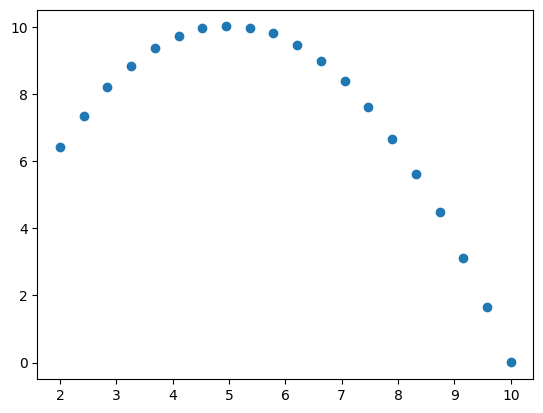

In [7]:
# 生成随机数据
X=torch.unsqueeze(torch.linspace(2,10,20),dim=1) #x data(tensor),shape=(100,1)
Y= -0.4*X*X + 4*X + 0.08*torch.rand(X.size())

plt.scatter(X, Y)
plt.show()

In [8]:
# 保存到csv文件中
# 如果想要使用框架代码训练这个数据集，需要手动将生成的两个csv拖动到data/test/目录下
x_np = X.numpy()
y_np = Y.numpy()
np.savetxt("data.csv", x_np, delimiter=",", fmt="%f")
np.savetxt("target.csv", y_np, delimiter=",", fmt="%f")

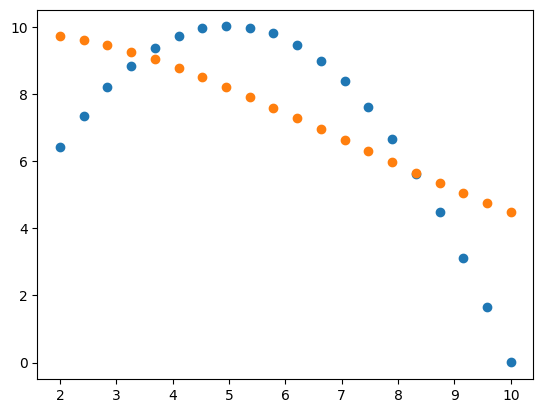

In [2]:
# 分别读取数据集和测试结果 放在一张图中展示
dataset_name = "test"
data_np = np.loadtxt("data/"+dataset_name+"/data.csv", delimiter=",", dtype=np.float32)
target_np = np.loadtxt("data/"+dataset_name+"/target.csv", delimiter=",", dtype=np.float32)
pred_np = np.loadtxt("data/"+dataset_name+"/pred.csv", delimiter=",", dtype=np.float32)

plt.scatter(data_np, target_np)
plt.scatter(data_np, pred_np)
plt.show()

In [152]:
# 定义网络结构
class Net(torch.nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(1,8)
        self.hidden2 = torch.nn.Linear(8,10)
        self.hidden3 = torch.nn.Linear(10,4)
        self.predict=torch.nn.Linear(4,1)

    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = F.relu(self.hidden2(x))
        x = F.relu(self.hidden3(x))
        x = self.predict(x)
        return x

In [153]:
net=Net()

optimizer = torch.optim.SGD(net.parameters(),lr=0.01)
loss_func = torch.nn.MSELoss()

In [154]:
# 进行训练
epochs = 5000
for t in range(epochs):
    prediction = net(X)    #喂给net训练数据x，输出预测值

    loss=loss_func(prediction,Y)    #计算两者的误差

    optimizer.zero_grad() #清空上一步的残余更新参数值
    loss.backward()    #误差反向传播，计算参数更新值
    optimizer.step()    #将参数更新值施加到net的parameters上

    print("Epoch [{}/{}], Loss: {:.4f}".format(t+1, epochs, loss.item()))

Epoch [1/5000], Loss: 0.7899
Epoch [2/5000], Loss: 0.7691
Epoch [3/5000], Loss: 0.7499
Epoch [4/5000], Loss: 0.7321
Epoch [5/5000], Loss: 0.7156
Epoch [6/5000], Loss: 0.7002
Epoch [7/5000], Loss: 0.6858
Epoch [8/5000], Loss: 0.6723
Epoch [9/5000], Loss: 0.6597
Epoch [10/5000], Loss: 0.6477
Epoch [11/5000], Loss: 0.6365
Epoch [12/5000], Loss: 0.6258
Epoch [13/5000], Loss: 0.6156
Epoch [14/5000], Loss: 0.6060
Epoch [15/5000], Loss: 0.5969
Epoch [16/5000], Loss: 0.5882
Epoch [17/5000], Loss: 0.5800
Epoch [18/5000], Loss: 0.5721
Epoch [19/5000], Loss: 0.5647
Epoch [20/5000], Loss: 0.5575
Epoch [21/5000], Loss: 0.5508
Epoch [22/5000], Loss: 0.5443
Epoch [23/5000], Loss: 0.5381
Epoch [24/5000], Loss: 0.5323
Epoch [25/5000], Loss: 0.5266
Epoch [26/5000], Loss: 0.5213
Epoch [27/5000], Loss: 0.5161
Epoch [28/5000], Loss: 0.5112
Epoch [29/5000], Loss: 0.5066
Epoch [30/5000], Loss: 0.5021
Epoch [31/5000], Loss: 0.4979
Epoch [32/5000], Loss: 0.4939
Epoch [33/5000], Loss: 0.4900
Epoch [34/5000], Lo

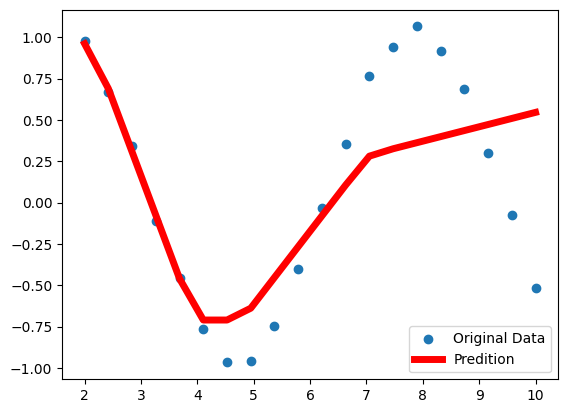

In [155]:
# 绘制结果
# 绘制原始数据点
plt.scatter(X.numpy(), Y.numpy(), label='Original Data')
plt.plot(X.data.numpy(),prediction.data.numpy(),'r-',lw=5, label='Predition')
plt.legend()
plt.show()